In [8]:
import mysql.connector
from mouseBehavior import mouseBehaviorData as mbd
from matplotlib import pyplot as plt
import os
import pandas as pd
import numpy as np
from analysis import checkforMouseBehaviorObject
import analysis

%matplotlib notebook
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [2]:
mouseID = '509808'

In [4]:
save_mouse_obj = False

mouseBehaviorObjectPath = r"\\allen\programs\braintv\workgroups\nc-ophys\corbettb\NP_behavior_pipeline\behavior_sessions\production"
dataframe_save_dir = r"\\allen\programs\braintv\workgroups\nc-ophys\corbettb\NP_behavior_pipeline\behavior_sessions\production"

#First look to see if there's already a behavior dataframe pkl file with this mouse's data
mouseBehaviorObjectPath = r"\\allen\programs\braintv\workgroups\nc-ophys\corbettb\NP_behavior_pipeline\behavior_sessions\production"
mouseBehaviorPklpath = checkforMouseBehaviorObject(mouseBehaviorObjectPath, mouseID)

if mouseBehaviorPklpath is not None:
    print('reading from pickle')
    m = mbd()
    m.loadFromPickle(mouseBehaviorPklpath)

else:
    print('fetching data')
    m = mbd(mouse_id=mouseID, daysBeforeHandoff=100)
    m.buildBehaviorDataframe(all_sessions=True)

if save_mouse_obj:
    m.saveDirectory = mouseBehaviorObjectPath
    m.saveToPickle()

checking \\allen\programs\braintv\workgroups\nc-ophys\corbettb\NP_behavior_pipeline\behavior_sessions\production for mouse object pkl
Found existing mouseBehaviorObject for mouse 509808
reading from pickle


<IPython.core.display.Javascript object>


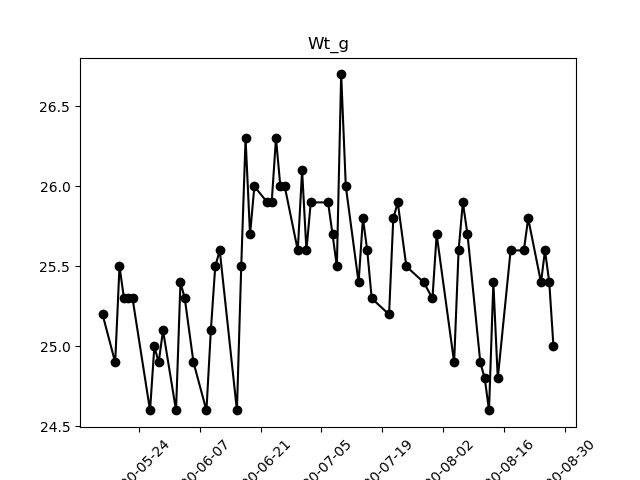

<IPython.core.display.Javascript object>


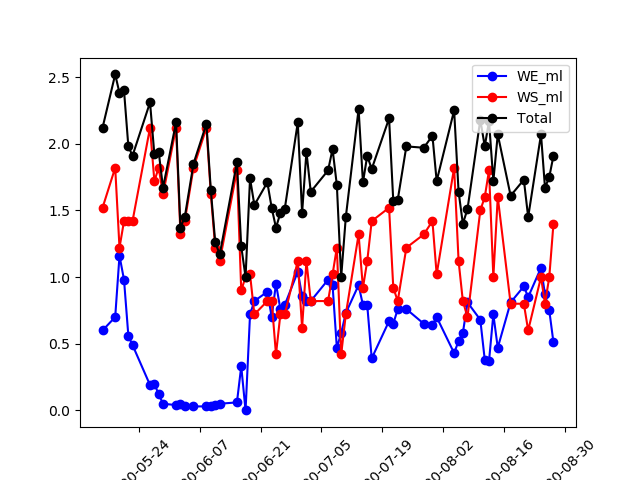

<IPython.core.display.Javascript object>


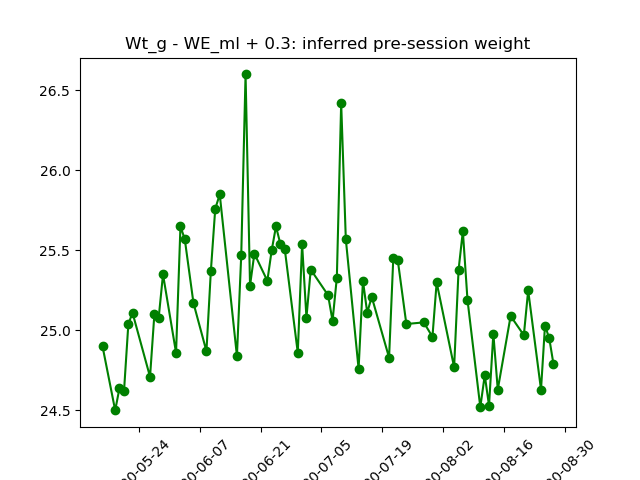

In [11]:
import analysis
analysis.plot_weight_over_time(m.beh_df)
analysis.plot_water_allotment(m.beh_df)
analysis.plot_inferred_presession_weight(m.beh_df, water_loss_during_session=0.3)

<IPython.core.display.Javascript object>


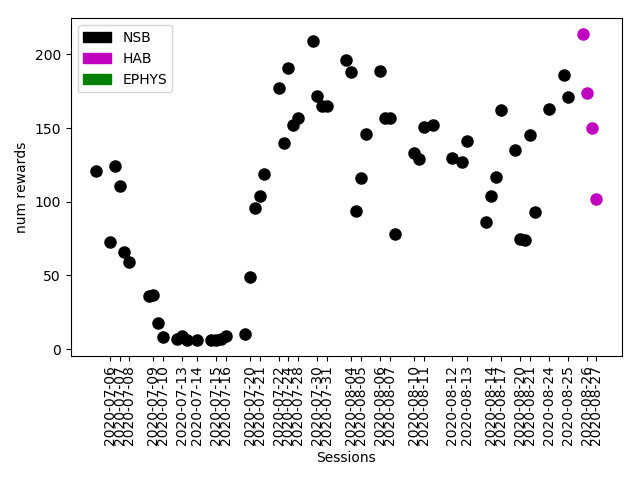

In [12]:
analysis.plotSessionHistory(m.beh_df)

In [30]:
#Simulate mTrain criteria
from mtrain_simulator import meets_hit_threshold_average, \
    meets_engagement_criteria_logged, meets_engagement_and_hit_threshold

alltrials = m.beh_df['trials'].to_list()
alltrials = pd.concat(alltrials)

class Mouse():
    
    def __init__(self, tc):
        self.trials = tc
        self.LabTracks_ID = '00000'
        self.session_summary = {}

mouse = Mouse(alltrials)
import logging
print(meets_hit_threshold_average(mouse))
print(meets_engagement_criteria_logged(mouse))
print(meets_engagement_and_hit_threshold(mouse))

behavior_session_uuid
c94b57ae-c553-4617-b9c0-42cc455e7d13      0.0
7c854164-1dfb-4ce9-a626-ce2030912f53     68.0
248f4c09-b13e-414b-9b17-1704ad7b82ad    108.0
808e40f5-28d4-44c4-9906-1e44267b59f1     85.0
2ae104d1-99c7-4175-96ca-4861ccd46de0     44.0
c3a5500c-a9b1-4201-b70a-902de9d75a49     37.0
0b333253-0069-43fe-979a-7b2764197965      2.0
ca837ee4-d4a4-4664-92fb-ece69147e66e      2.0
85ad2f26-f103-4597-b59d-9813d726e18a     12.0
ceef7da2-9dbf-482c-a871-7e224cf673cf      3.0
774891f7-e0f3-4641-bca5-8fd05cf46938      2.0
b1943625-3023-424c-9b11-6711fc12ddda      4.0
b8b79d20-04fb-49a4-afa1-7ceebe0234a6      1.0
383c196b-81c0-4b12-a7cd-8970815039a8      1.0
e261f6ce-218c-4399-84d6-4629bb7228cd      1.0
34d39b7b-afef-40aa-b96c-e242c11fb149      1.0
bb1d4100-a716-4862-a763-ac2a9ba962e6      2.0
66f850eb-ac22-4a55-9a51-5caf54b42407      4.0
4bc329c9-befb-4786-848d-80ae08d92b83      5.0
ab10d7f0-dfe8-4119-a22b-877e25c81bc2     43.0
ada1d0a0-485f-4382-ba4d-6cdfd9135686     91.0
7f980151-30c